# Estimando o consumo de veículos

### Bibliotecas

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

### Abrindo Dataset

Visualizando os primeiros exemplos contidos no dataset (cabeçalho).
Passo útil para checar se a importação foi realizada corretamente e a disposição dos dados.

In [8]:
df = pd.read_csv("features_autompg.csv", sep = ';')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Conhecendo o dataset
Explorando o conjunto de dados

1. Quantos exemplos há no dataset?

In [9]:
len(df)

406

2. Quais os atributos existentes no dataset?

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'name'],
      dtype='object')

3. Quais os nomes dos carros existentes no dataset?

In [12]:
df["name"]

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
401              ford mustang gl
402                    vw pickup
403                dodge rampage
404                  ford ranger
405                   chevy s-10
Name: name, Length: 406, dtype: object

4. Quais as características do 'chevrolet camaro'?

In [13]:
df.loc[df["name"] == "chevrolet camaro"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [14]:
np.mean(df["mpg"])

23.514572864321607

### Preparação dos dados

1. Eliminando exemplos com dados faltantes

In [15]:
df.dropna(inplace = True)
len(df)

392

2. Excluindo a coluna com os nomes dos carros

In [16]:
df.drop(["name"], axis = 1, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


3. Convertendo mpg para km/l (1 mpg  = 0.425 km/l) usando duas casas decimais

In [19]:
kml = []

for x in df["mpg"]:
    x *= 0.425
    kml.append(round(x, 2))

4. Removendo a coluna mpg e inserindo a coluna kml no dataset

In [20]:
df["kml"] = kml
df.drop(["mpg"], axis = 1, inplace = True)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,kml
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,7.22


### Organização dos dados para treinamento

1. Removendo a coluna kml e armazenando-a em Y
2. Atribuindo os demais valores do dataset a X

In [21]:
Y = df["kml"]
df.drop(["kml"], axis = 1, inplace = True)
X = df
X.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


3. Fazendo uma partição holdout 70/30 com o sklearn

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

### Treinamento de um modelo ML: Regressão Linear

1. Importado da biblioteca sklearn
2. Instanciando-o com parâmetros padrão (default)
3. Executando o algoritmo de treinamento com os dados de treino

In [23]:
regr = LinearRegression()

# Treinando o modelo com os dados obtidos na partição holdout
regr.fit(X_train, Y_train)

LinearRegression()

### Teste do modelo

Observando a saída do modelo para dois exemplos individuais contidos nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Comparando o resultado obtido com o esperado

In [24]:
teste1 = X_test[2:3]
resultado = regr.predict(teste1)
print(resultado, Y_test.iloc[2])

[9.70874979] 7.22


* Atributos preditores: X_test[80:81]
* Atributo alvo: Y_test.iloc[80]
* Comparando o resultado obtido com o esperado

In [25]:
teste2 = X_test[80:81]
resultado = regr.predict(teste2)
print(resultado, Y_test.iloc[80])

[5.01808773] 6.8


### Métricas do modelo

1. Calculando o erro médio quadrático para todos os dados de teste
 * Somatório do quadrado das diferenças entre valores previstos pelo modelo e observados na prática
 * Quanto mais próximo de zero, melhor este resultado

In [26]:
Y_predito = regr.predict(X_test)
mse = mean_squared_error(Y_predito, Y_test)
mse

1.8857385185778741

2. Obtenha o r^2 para os dados de teste
 * Um valor no intervalo [-infinito (ou 0),1]
 * Quanto mais próximo de 1, melhor é o modelo

In [27]:
r2 = r2_score(Y_predito, Y_test)
r2

0.7844540173280055

### Obtendo os resíduos
Diferença entre os valores previstos e os esperados

In [28]:
residuos = []
for (x,y) in zip(Y_test,Y_predito):
    residuos.append((x-y)**2)
residuos

[1.1275232263947466,
 0.3630244506015508,
 6.193875534698872,
 0.02842778886869304,
 0.4326911550441734,
 1.0278378859194555,
 0.011666923478874065,
 0.711650817385362,
 0.7657562424133403,
 0.09415706062256886,
 1.8604528574731678,
 0.7101974450477975,
 0.0034085297115139836,
 0.018698479362870623,
 0.08475709331795273,
 5.643395128861889,
 1.3762296670049772,
 5.312903696359451,
 0.010059524586593236,
 0.14814506675968336,
 0.2193086013640924,
 0.03472348541322303,
 4.159251476802649,
 0.7252576738852333,
 0.8011078245762164,
 0.029827894892737464,
 0.5823882923929297,
 0.1403495371937432,
 2.530272502556198,
 1.5141295895630567,
 0.02840634822539075,
 0.01815762365761195,
 0.128591074609612,
 6.86400846228937,
 4.603457964601095,
 1.3873509530840302,
 15.573928810774513,
 0.1853195739444036,
 0.1867029319365949,
 2.110019211656623,
 1.1045295650838904,
 0.9053699097375926,
 3.827919783191091,
 2.710569053718721,
 0.85318298195708,
 0.39200670063692705,
 0.31052783327849437,
 3.36992

* Plotando gráfico com os resíduos

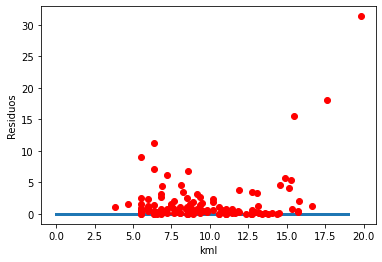

In [36]:
x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test,residuos,'ro')
plt.ylabel('Residuos')
plt.xlabel('kml')
plt.savefig("Regressão Linear - Resíduos kml.jpg")
plt.show()

### Testando K-Vizinhos Mais Próximos
1. Treinando K-Vizinhos mais Próximos, considerando k =5

In [33]:
kviz = KNeighborsRegressor(n_neighbors=5)
kviz.fit(X_train,Y_train)

KNeighborsRegressor()

2. Obtendo o Erro Médio Quadrático para o conjunto de testes

In [34]:
Y_preditoKViz = kviz.predict(X_test)
msekviz = mean_squared_error(Y_preditoKViz,Y_test)
msekviz

2.631296813559323

3. Obtendo r^2 para o conjunto de testes

In [35]:
r2KViz = r2_score(Y_preditoKViz, Y_test)
r2KViz

0.6871643992668753

4. Calculando os resíduos e plotando o gráfico

In [37]:
residuosKViz = []
for (x,y) in zip(Y_test,Y_preditoKViz):
    residuosKViz.append((x-y)**2)
residuosKViz

[2.347023999999999,
 4.972900000000002,
 4.717584000000007,
 4.562496000000004,
 0.22467600000000104,
 0.006724000000000413,
 4.024036000000001,
 1.1025000000000016,
 0.10368399999999947,
 0.03534399999999956,
 13.912900000000016,
 1.4786559999999984,
 0.08409999999999951,
 1.3642239999999983,
 0.20976400000000017,
 18.610596000000015,
 0.4488999999999999,
 16.646400000000014,
 6.071296000000002,
 0.0029160000000000292,
 0.05569599999999989,
 2.6308840000000027,
 4.919523999999992,
 0.3091359999999991,
 0.589824000000001,
 0.6723999999999976,
 9.43718399999999,
 1.0732959999999991,
 2.5792359999999994,
 0.007055999999999938,
 0.586756,
 0.1183359999999996,
 0.7638760000000026,
 0.1368999999999994,
 0.029584000000000204,
 3.225616000000001,
 36.43329600000002,
 0.10368399999999947,
 1.8495999999999984,
 1.0691559999999978,
 0.0004840000000000888,
 0.0019360000000001208,
 0.021315999999999197,
 0.5990759999999986,
 1.4786560000000004,
 0.6593440000000019,
 1.3041639999999988,
 5.76000000

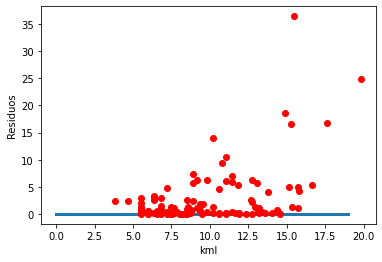

In [38]:
x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test,residuosKViz,'ro')
plt.ylabel('Residuos')
plt.xlabel('kml')
plt.savefig("K-Vizinhos mais próximos - Resíduos kml.jpg")
plt.show()